c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing 

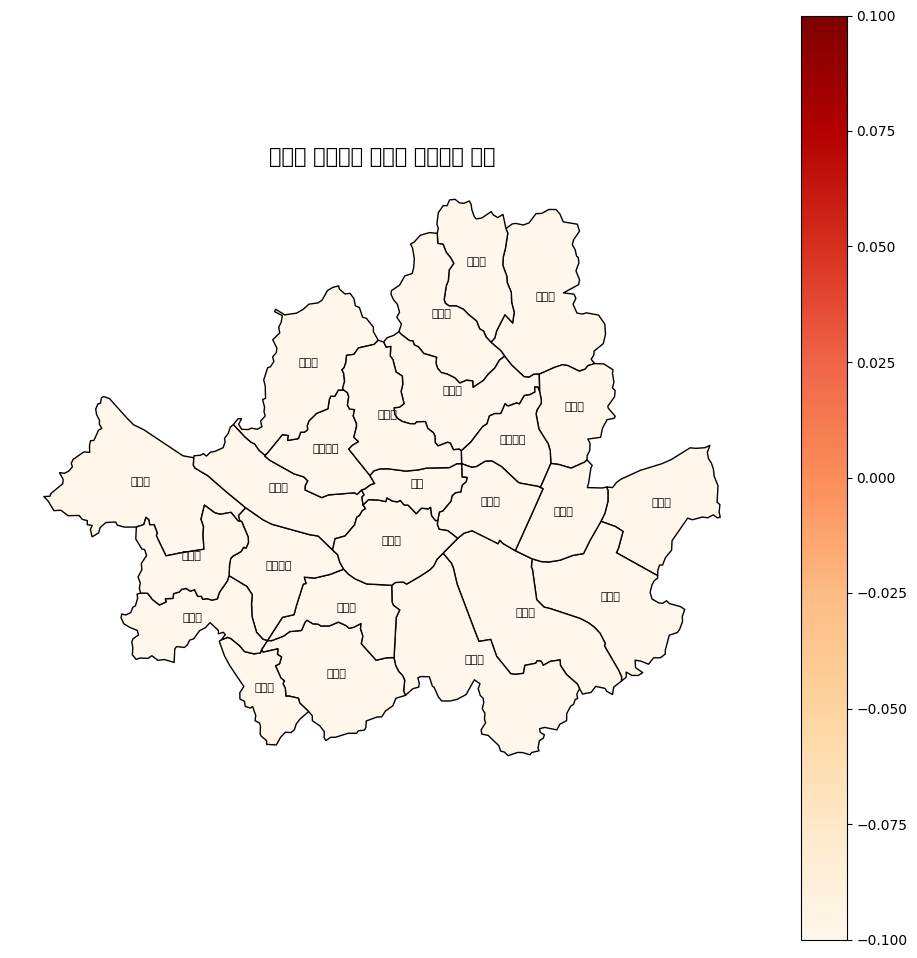

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

# 파일 경로


# 서울 행정구역 json raw파일(githubcontent)
geojson_url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
file_path = r'C:\Users\bluecom011\Desktop\공모전\단속데이터\서울특별시_장애인 주차구역 과태료 부과 현황_20230209 (2).CSV'
# 데이터 로드
data = pd.read_csv(file_path, encoding='cp949')

# 자치구별 취업자 수 집계
borough_counts = data['서울특별시(자치구)'].value_counts()
borough_counts_df = borough_counts.reset_index()
borough_counts_df.columns = ['서울특별시(자치구)', '건수']

# 서울시 자치구 지리적 경계 데이터 로드
seoul_map = gpd.read_file(geojson_url)

# 데이터 병합
merged_data = seoul_map.set_index('name').join(borough_counts_df.set_index('서울특별시(자치구)'))
merged_data['건수'] = merged_data['건수'].fillna(0)

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_data.plot(column='건수', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('서울시 자치구별 장애인 주차위반 건수', fontsize=15)

# 자치구 이름 추가
for idx, row in merged_data.iterrows():
    plt.annotate(text=idx, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8)

ax.axis('off')
plt.show()


In [53]:
import json
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

# 미국 주별 실업률 데이터 불러오기
file_path = r'C:\Users\bluecom011\Desktop\공모전\단속데이터\서울특별시_장애인 주차구역 과태료 부과 현황_20230209 (2).CSV'
# 데이터 로드
data_pay = pd.read_csv(file_path, encoding='cp949')

bins = list(data_pay.quantile([0, 0.25, 0.5, 0.75, 1]))
# 서울의 중심 좌표로 맵 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)
import json
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

# 미국 주별 실업률 데이터 불러오기
file_path = r'C:\Users\bluecom011\Desktop\공모전\단속데이터\서울특별시_장애인 주차구역 과태료 부과 현황_20230209 (2).CSV'
# 데이터 로드
data_pay = pd.read_csv(file_path, encoding='cp949')

# Set the bin values for color scale
bins = list(data_pay.quantile([0, 0.25, 0.5, 0.75, 1]))

# 서울의 중심 좌표로 맵 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    data=data_pay,
    columns=['서울특별시(자치구)', '건수'],
    fill_color='YlGn',
    fill_opacity=0.5,
    bins=bins,  # Specify the bin values for color scale
    legend_name='Unemployment rate (%)'
).add_to(m)

m

folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json', # 경계선 좌표값이 담긴 데이터
    data=data_pay, # Series or DataFrame 넣으면 된다
    columns=['건수','서울특별시(자치구)'], # DataFrame의 어떤 columns을 넣을지
    # key_on='feature.name', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='YlGn',
    fill_opacity=0.5, # 색 투명도
    bins= 8,
    legend_name='Unemployment rate (%)' # 범례
).add_to(m)
m

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [43]:
# 미국 주별 실업률 데이터 불러오기
file_path = r'C:\Users\bluecom011\Desktop\공모전\단속데이터\서울특별시_장애인 주차구역 과태료 부과 현황_20230209 (2).CSV'
# 데이터 로드
data_pay = pd.read_csv(file_path, encoding='cp949')
data_pay.head(5)

,서울특별시(자치구),건수,부과액
0,종로구,892,75000260
1,중구,2154,185440000
2,용산구,1438,138260000
3,성동구,2264,195190000
4,광진구,1594,133660000


In [72]:
import folium
import pandas as pd

# 데이터 프레임 생성
file_path = r'C:\Users\bluecom011\Desktop\공모전\단속데이터\서울특별시_장애인 주차구역 과태료 부과 현황_20230209 (2).CSV'
# 데이터 로드
data_pay = pd.read_csv(file_path, encoding='cp949')

# '건수' 열을 숫자로 변환
data_pay['건수'] = pd.to_numeric(data_pay['건수'], errors='coerce')

# Quantile 계산
bins = list(data_pay['건수'].quantile([0, 0.5, 0.75, 1]))

# Choropleth 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울의 중심 좌표로 설정

# Choropleth 레이어 추가
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=data_pay,
    columns=['자치구', '건수'],
    key_on='properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='건수 비율',
    bins=bins
).add_to(seoul_map)

seoul_map


In [51]:
import plotly.express as px
import pandas as pd 
import os 
import json 
# Choropleth 시각화
geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json', # 경계선 좌표값이 담긴 데이터
# '서울특별시(자치구)'가 실제 데이터프레임에서 위치 정보를 가진 컬럼이라고 가정
fig = px.choropleth(data_pay, 
                    geojson=geo_data, 
                    locations='서울특별시(자치구)', 
                    color='건수',
                    color_continuous_scale='Blues',
                    featureidkey='properties.서울특별시(자치구)')

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(title_text='위반건수', title_font_size=20)
fig.show()
